Untergrund= 14.8 ± 0.393333335871
Fitgerade=b+c*x
b= -1065.35999616 ± 7894.36000758
c= 227.099999261 ± 291.08996961
chisq= 5.43662151327
chisq_red= 2.71831075663
Fitwahrscheinlichkeit= 7.0 %


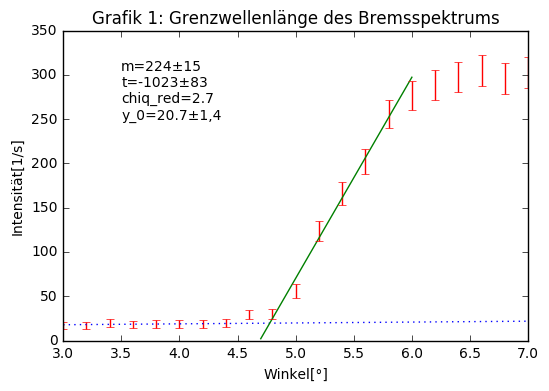

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Winkel, Intensität=np.loadtxt("/Users/Jochen/1a Kopie.txt", unpack=True)
fehler_Intensität=np.sqrt(Intensität)
Winkel1=Winkel[1:5:1]
Intensität1=Intensität[1:5:1]
Winkel2=Winkel[9:14:1]
Intensität2=Intensität[9:14:1]
fehler_Intensität2=fehler_Intensität[9:14:1]

def linear1(x,a):
    return a+x
popt, pcov = curve_fit(linear1,Winkel1,Intensität1,p0=[1])

def linear2(x,b,c):
    return b+c*x
popt2,pcov2=curve_fit(linear2,Winkel2,Intensität2,p0=None)

x=np.linspace(3,7,20)
y=np.linspace(4.7,6,20)

plt.plot(x,linear1(x,*popt),label="Untergrund",linestyle=':')
plt.plot(y,linear2(y,*popt2), label="Extrapolation")
plt.errorbar(Winkel, Intensität,fehler_Intensität, linestyle='None')
plt.xlabel('Winkel[°]')
plt.ylabel('Intensität[1/s]')
plt.title('Grafik 1: Grenzwellenlänge des Bremsspektrums')

print('Untergrund=',popt[0],'±',pcov[0][0])
print('Fitgerade=b+c*x')
print('b=',popt2[0],'±',pcov2[0][0])
print('c=',popt2[1],'±',pcov2[1][1])

chisq=np.sum((linear2(Winkel2,*popt2)-Intensität2)**2/fehler_Intensität2**2)
dof=2
chisq_red=chisq/dof
print('chisq=',chisq)
print('chisq_red=',chisq_red)
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisq,dof),2)*100
print('Fitwahrscheinlichkeit=',prob,'%')
plt.text(3.5,250,"m=224±15\nt=-1023±83\nchiq_red=2.7\ny_0=20.7±1,4")
plt.savefig("/Users/Jochen/Documents/Studium/Physik/Praktikum/PAP 2.2/255 Röntgenspektrometer/Grenzwellenlänge.jpeg", format="jpeg",dpi=300)